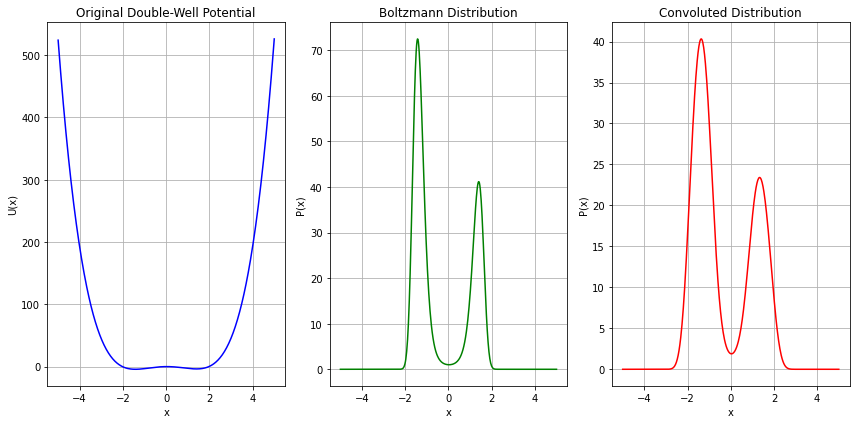

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def piecewise_parabolic_kernel_1d(size: int, sigma: float) -> np.ndarray:
    """Generate a 1D piecewise parabolic kernel with compact support."""
    x = np.linspace(-sigma, sigma, size)
    
    def f(x):
        """Piecewise function f(x)"""
        if -sigma <= x < -sigma / 2:
            return (2 / sigma) * (1 + x / sigma)**2
        elif -sigma / 2 <= x <= sigma / 2:
            return (1 / sigma) - (2 / sigma) * (x / sigma)**2
        elif sigma / 2 < x <= sigma:
            return (2 / sigma) * (1 - x / sigma)**2
        else:
            return 0

    kernel = np.array([f(xi) for xi in x])
    return kernel / kernel.sum()  # Normalize

def double_well_potential(x: np.ndarray) -> np.ndarray:
    """Compute the 1D double-well potential function U(x) = x^4 - 4x^2 + 0.2x."""
    return x**4 - 4*x**2 + 0.2*x

# Parameters
size = 101  # Number of points in the kernel
sigma = 2.0  # Width of the kernel

# Generate the 1D kernel
kernel_1d = piecewise_parabolic_kernel_1d(size, sigma)

# Define the range and sample points
x = np.linspace(-5, 5, 500)

# Compute the double-well potential and Boltzmann distribution
potential_array = double_well_potential(x)
boltzmann_distribution = np.exp(-potential_array)

# Perform convolution
convoluted_distribution = convolve(boltzmann_distribution, kernel_1d, mode='same')

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the original potential
plt.subplot(1, 3, 1)
plt.plot(x, potential_array, label='Double-Well Potential', color='blue')
plt.title('Original Double-Well Potential')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.grid(True)

# Plot the Boltzmann distribution
plt.subplot(1, 3, 2)
plt.plot(x, boltzmann_distribution, label='Boltzmann Distribution', color='green')
plt.title('Boltzmann Distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)

# Plot the convoluted result
plt.subplot(1, 3, 3)
plt.plot(x, convoluted_distribution, label='Convoluted Distribution', color='red')
plt.title('Convoluted Distribution')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)

plt.tight_layout()
plt.show()
